<a href="https://colab.research.google.com/github/aditya-04kashyap/ExploratoryDataAnalysisAssignment/blob/main/EDADA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#21bds0041
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("bank-full.csv", delimiter=';')


In [12]:
# Step 1: Explore Dimensions
print("Shape of the dataset:", df.shape)
print("\nColumn Names:\n", df.columns)


Shape of the dataset: (41188, 21)

Column Names:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [13]:
# Step 2: Summary
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

In [25]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Handling missing values (if any)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')


Missing Values in Each Column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Number of Duplicate Rows: 0


<ipython-input-25-38d10eb690dc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



Univariate Analysis Plots


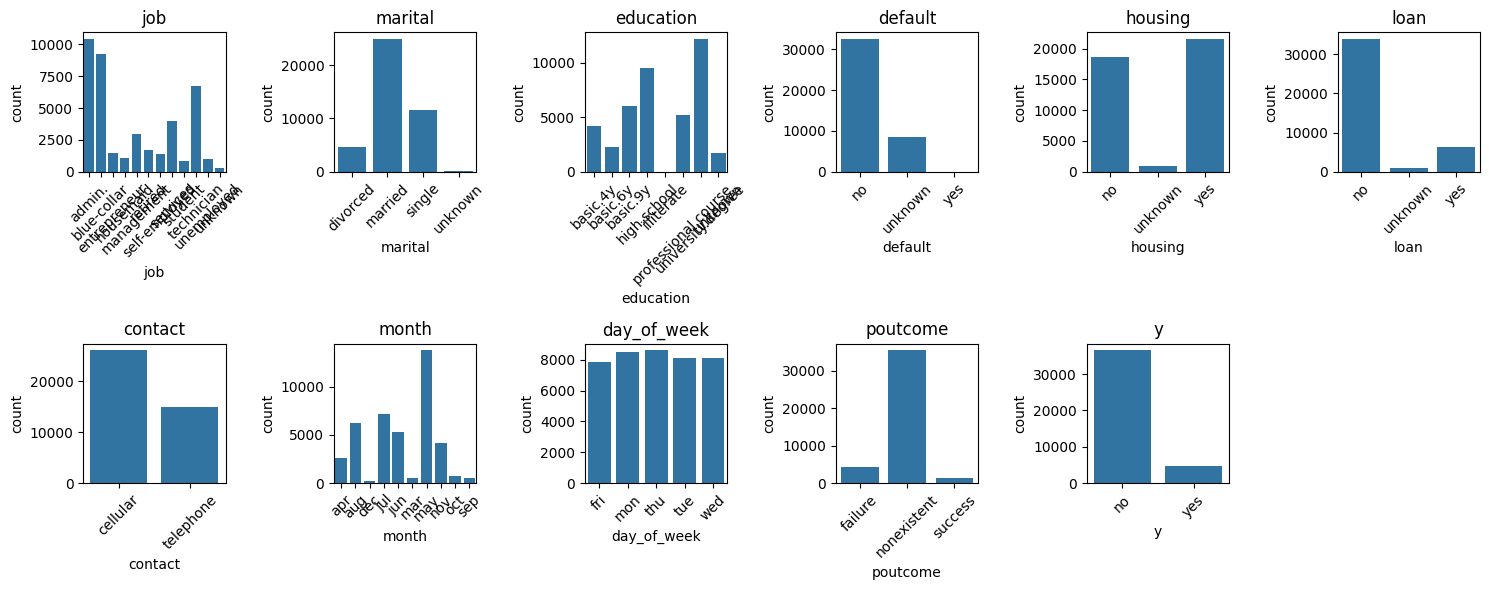

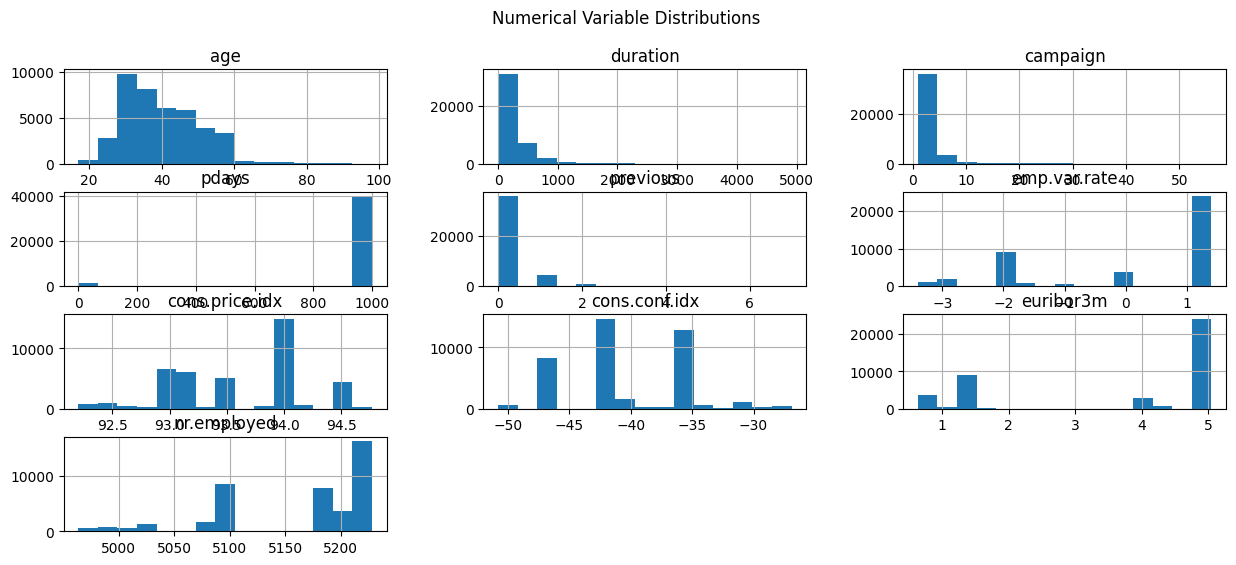

In [15]:
# Step 4: Univariate Analysis
print("\nUnivariate Analysis Plots")
plt.figure(figsize=(15, 6))
for i, col in enumerate(df.select_dtypes(include=['category', 'object']).columns, 1):
    plt.subplot(2, len(df.select_dtypes(include=['category', 'object']).columns)//2 + 1, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Numeric column distribution
df.select_dtypes(include=['int64', 'float64']).hist(bins=15, figsize=(15, 6))
plt.suptitle('Numerical Variable Distributions')
plt.show()




Bivariate Analysis Plots


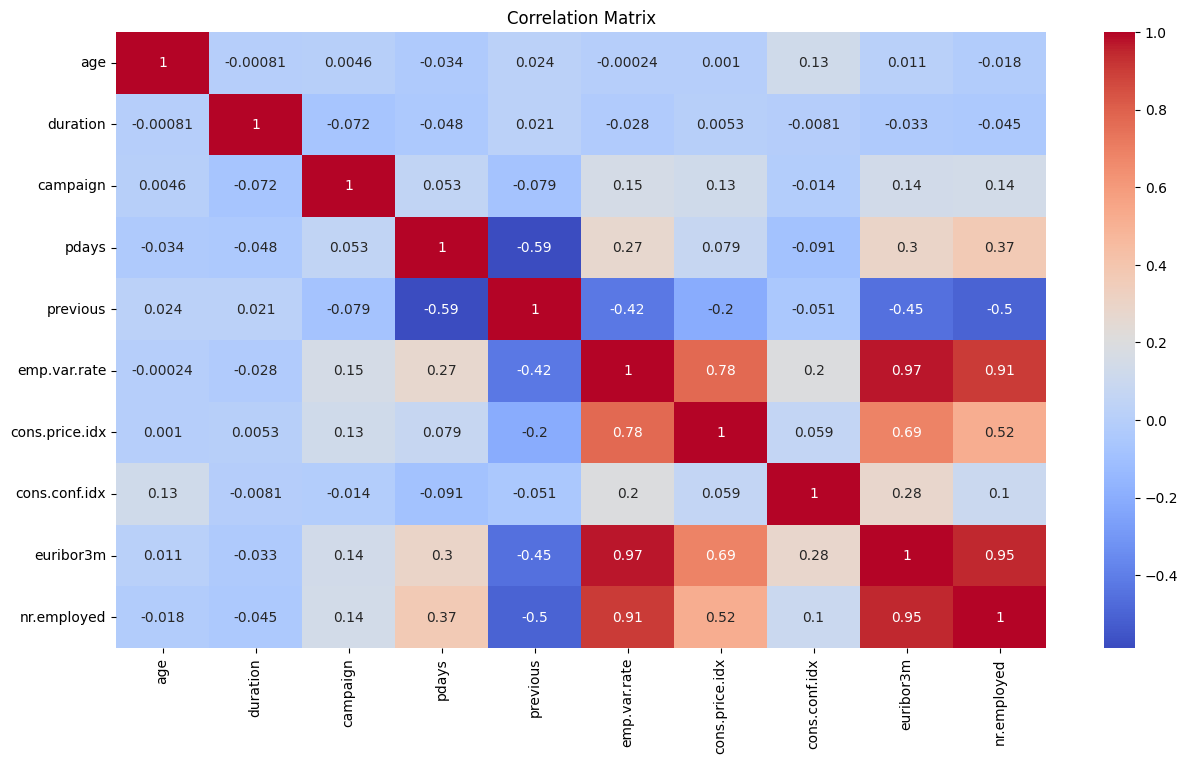


Scatter Plot: Example - Duration vs Campaign


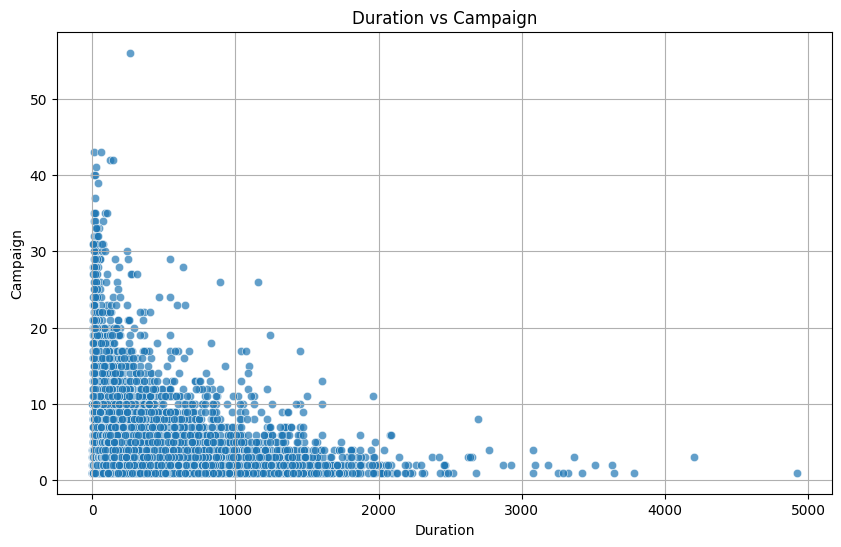


Box Plot: Example - Job vs Duration


<ipython-input-19-f94b1b0c1ed1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job', y='duration', palette='Set2')


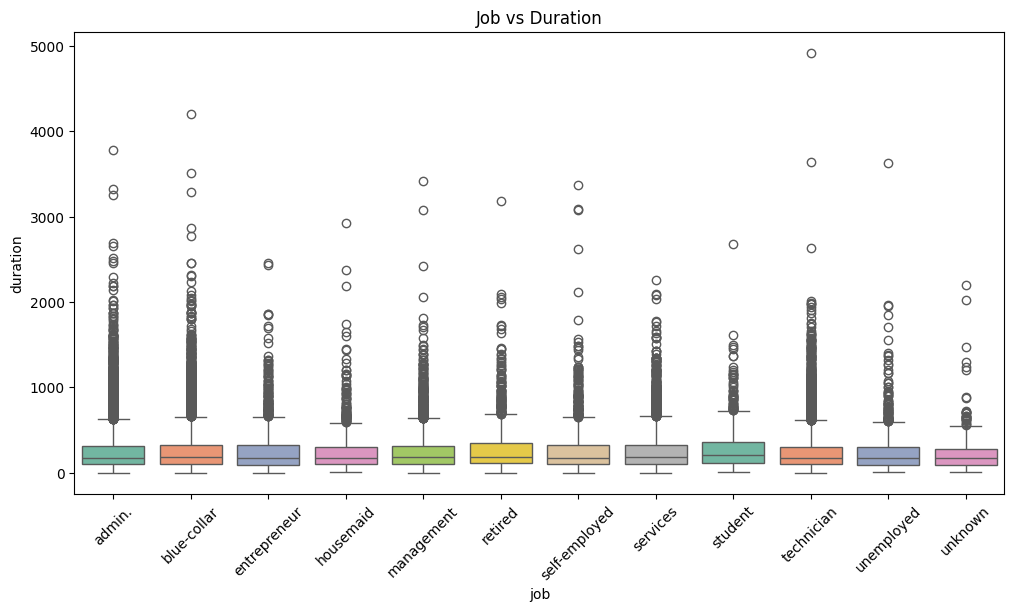


Violin Plot: Example - Education vs Duration


<ipython-input-19-f94b1b0c1ed1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='education', y='duration', palette='muted', split=True)


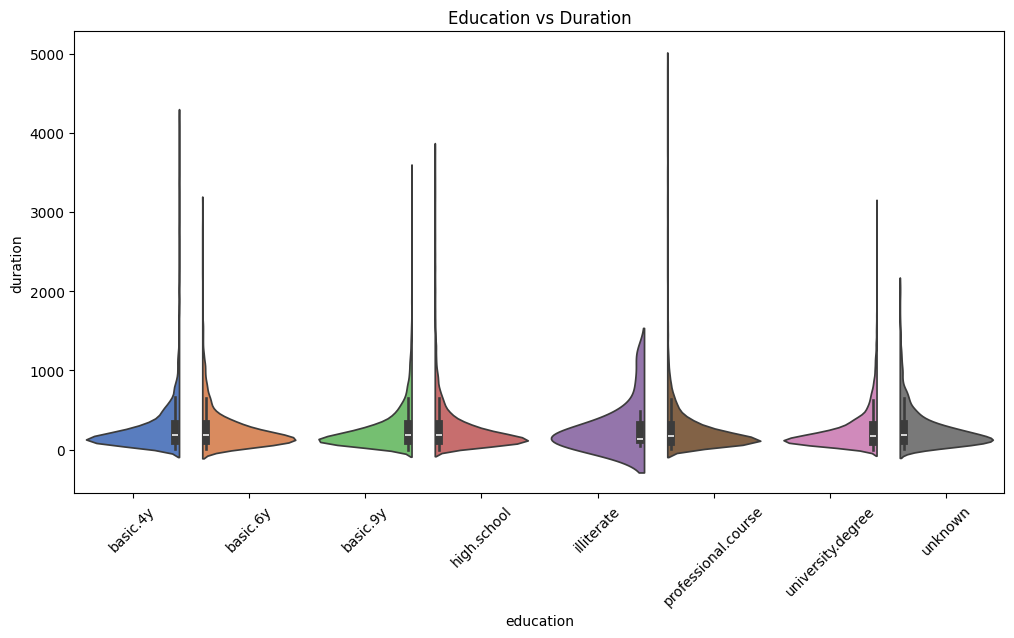


Bar Plot: Example - Marital Status vs Average Campaign


<ipython-input-19-f94b1b0c1ed1>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='marital', y='campaign', ci=None, palette='pastel')
<ipython-input-19-f94b1b0c1ed1>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='marital', y='campaign', ci=None, palette='pastel')


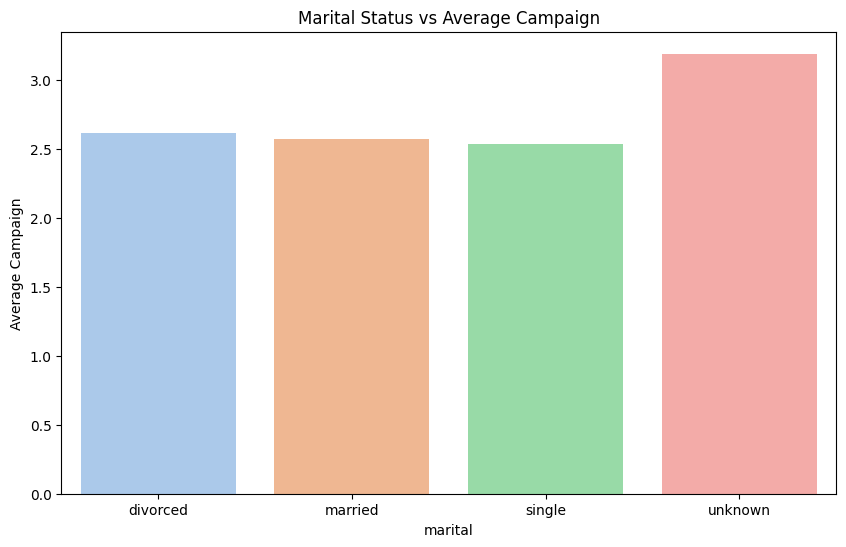


Line Plot: Example - Duration vs Employment Rate


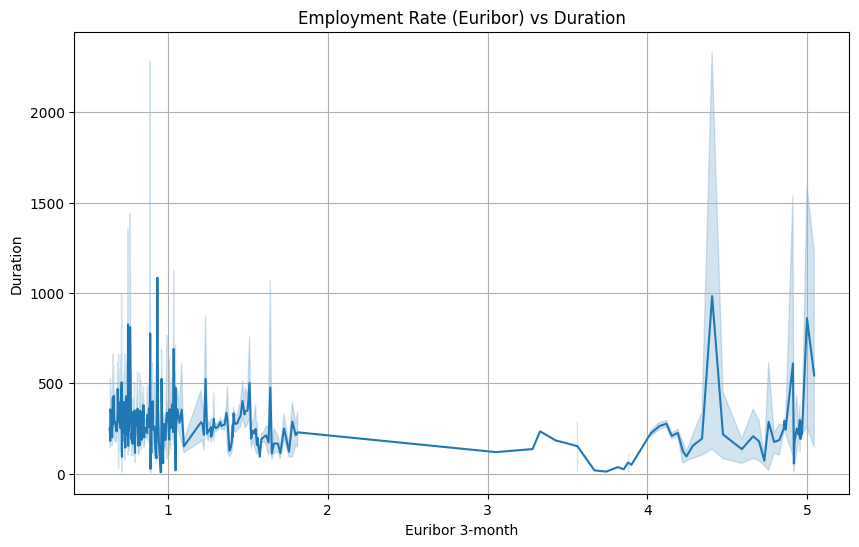

In [19]:
# Step 5: Bivariate Analysis
print("\nBivariate Analysis Plots")

# 1. Heatmap for Correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2. Scatter Plot
print("\nScatter Plot: Example - Duration vs Campaign")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='campaign', alpha=0.7)
plt.title('Duration vs Campaign')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.grid(True)
plt.show()

# 3. Box Plot
print("\nBox Plot: Example - Job vs Duration")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job', y='duration', palette='Set2')
plt.title('Job vs Duration')
plt.xticks(rotation=45)
plt.show()



# 4. Violin Plot
print("\nViolin Plot: Example - Education vs Duration")
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='education', y='duration', palette='muted', split=True)
plt.title('Education vs Duration')
plt.xticks(rotation=45)
plt.show()

# 5. Bar Plot
print("\nBar Plot: Example - Marital Status vs Average Campaign")
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='marital', y='campaign', ci=None, palette='pastel')
plt.title('Marital Status vs Average Campaign')
plt.ylabel('Average Campaign')
plt.show()

# 6. Line Plot
print("\nLine Plot: Example - Duration vs Employment Rate")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='euribor3m', y='duration')
plt.title('Employment Rate (Euribor) vs Duration')
plt.xlabel('Euribor 3-month')
plt.ylabel('Duration')
plt.grid(True)
plt.show()







Multivariate Analysis

Multivariate Analysis


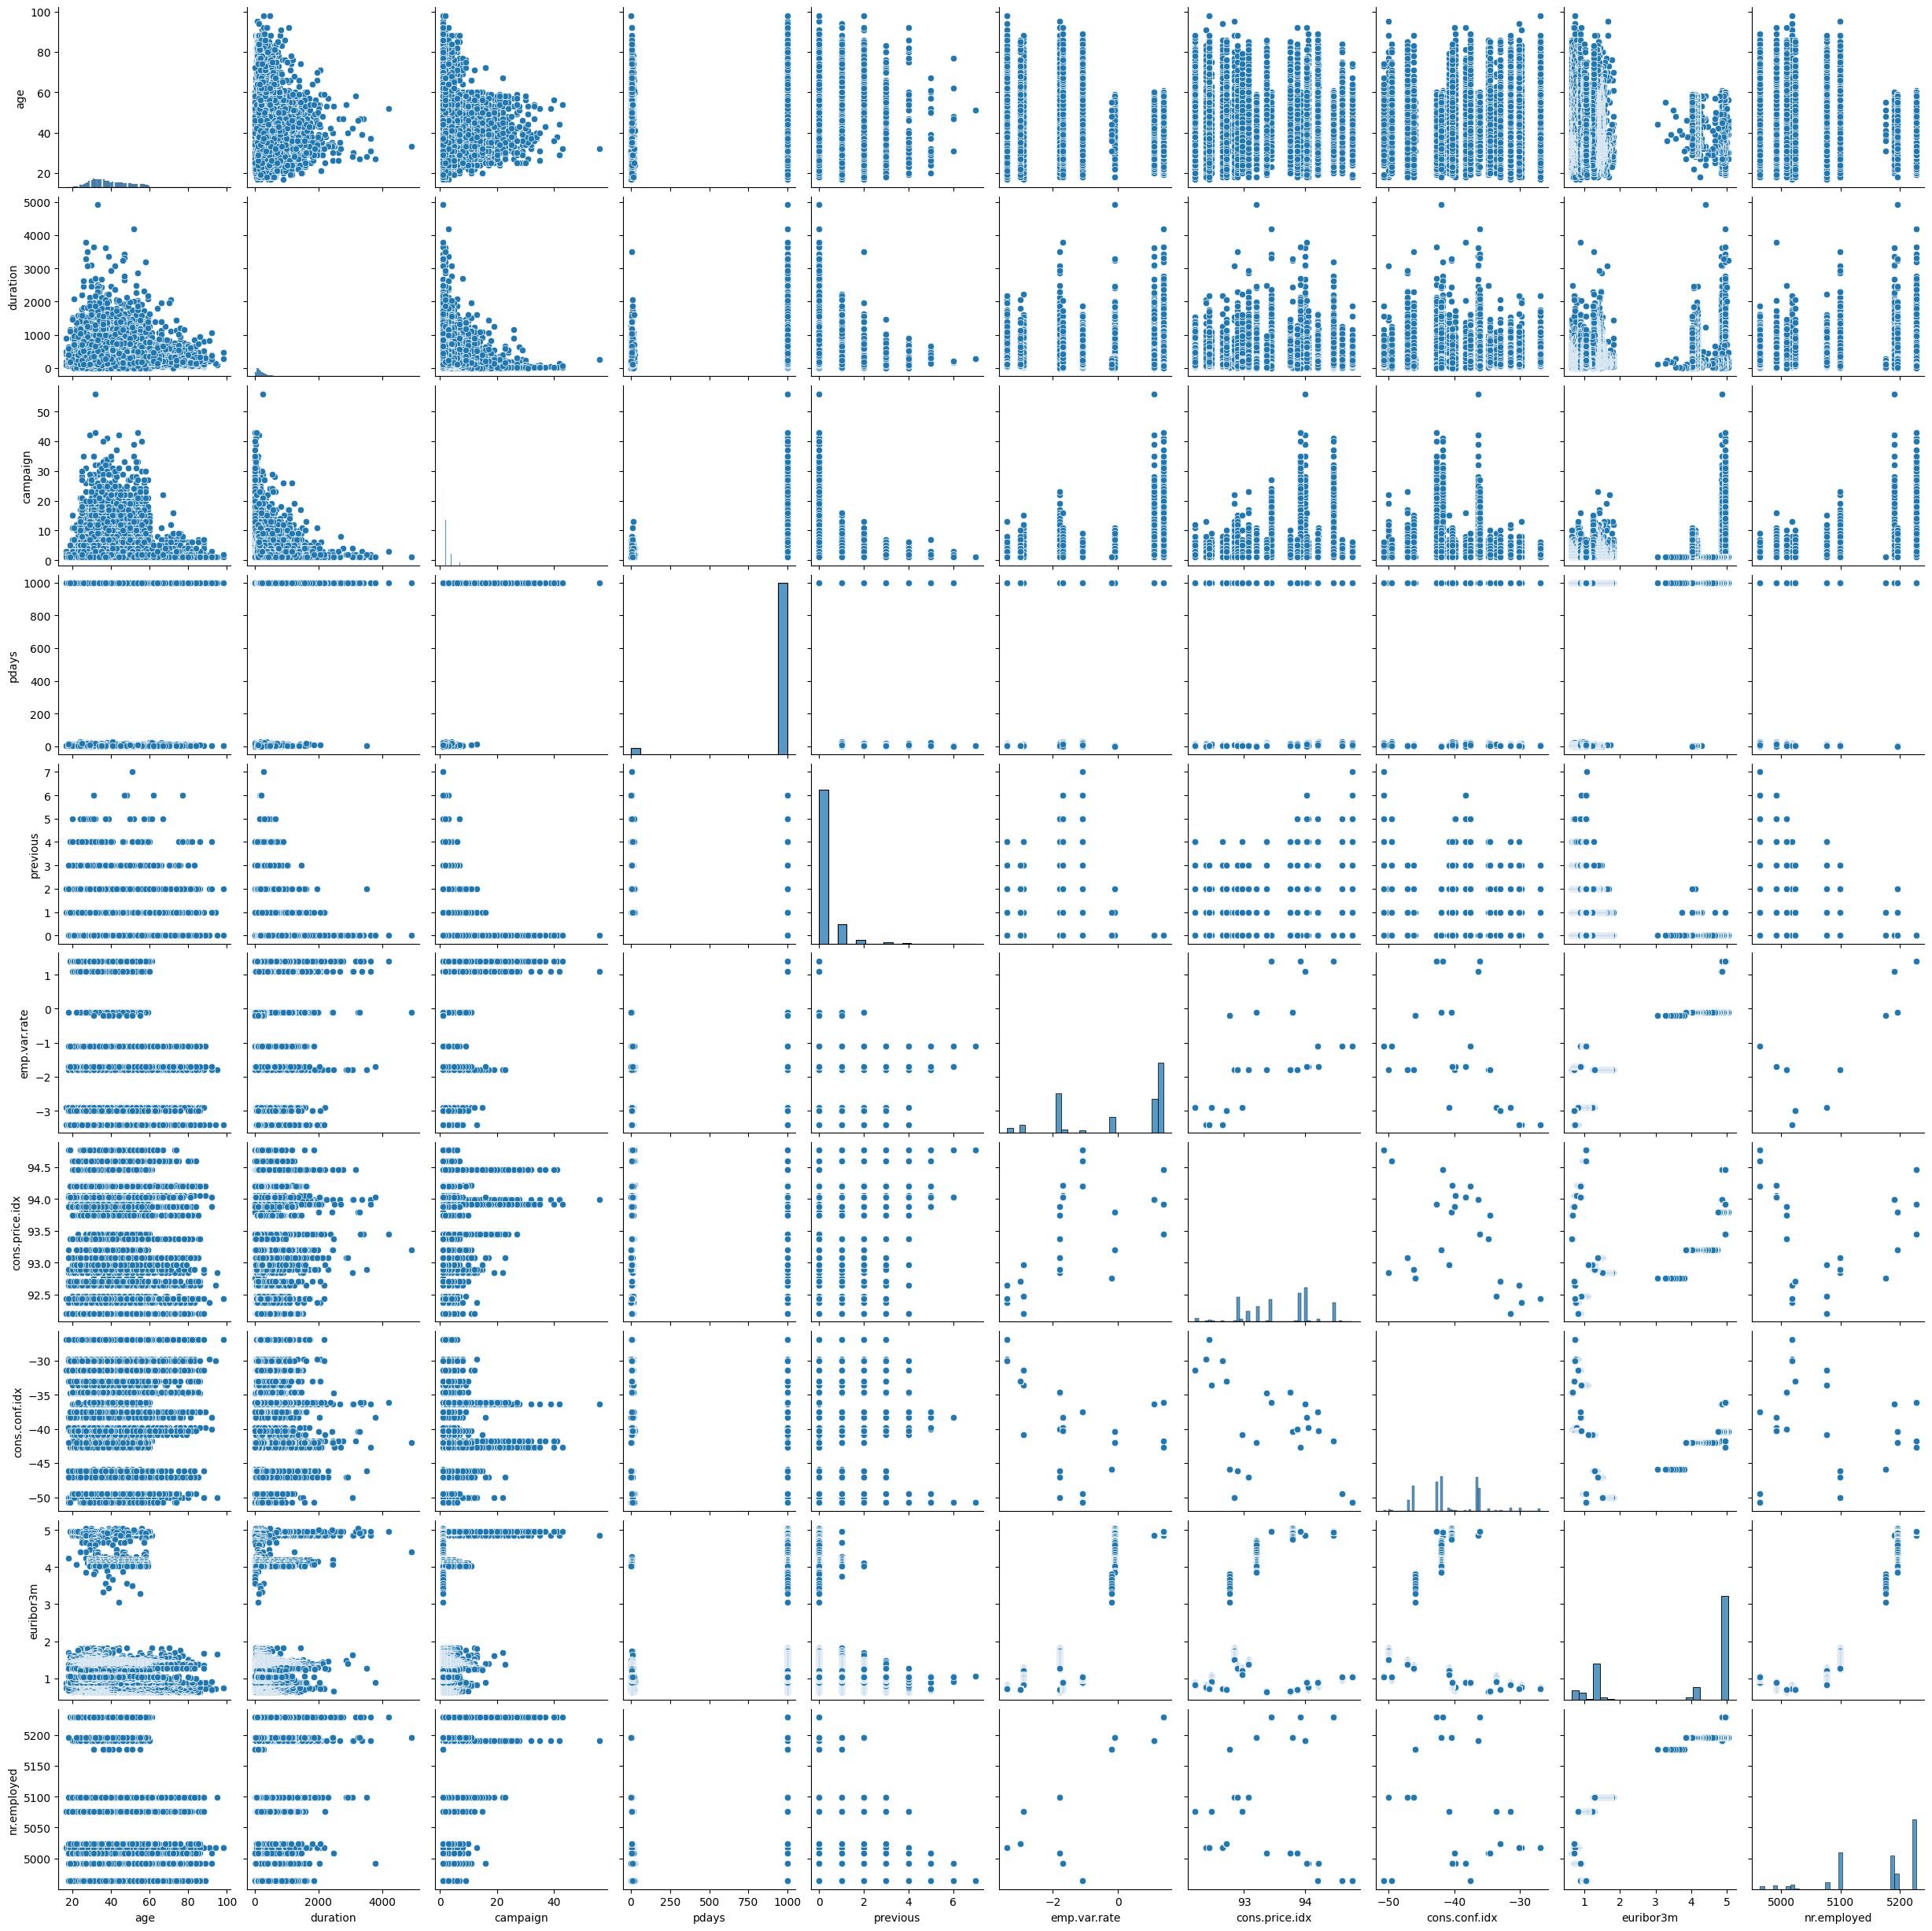


Stacked Bar Plot: Marital vs Housing colored by Default


<ipython-input-23-5688c0928129>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_housing = df.groupby(['marital', 'housing'])['default'].value_counts().unstack().fillna(0)


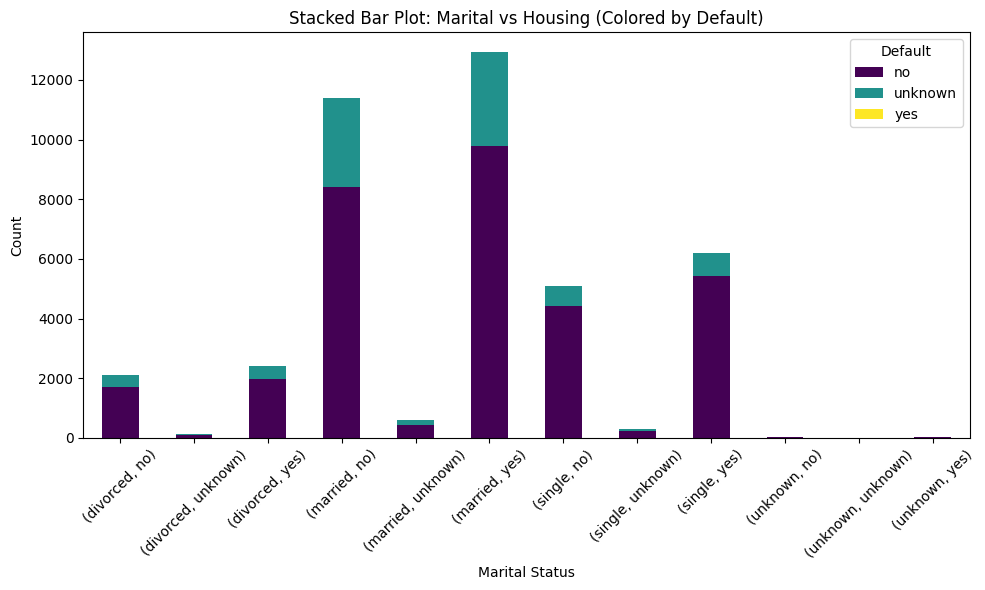


Heatmap: Job and Education with Housing Count


<ipython-input-23-5688c0928129>:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='job', columns='education', values='housing', aggfunc='count').fillna(0)


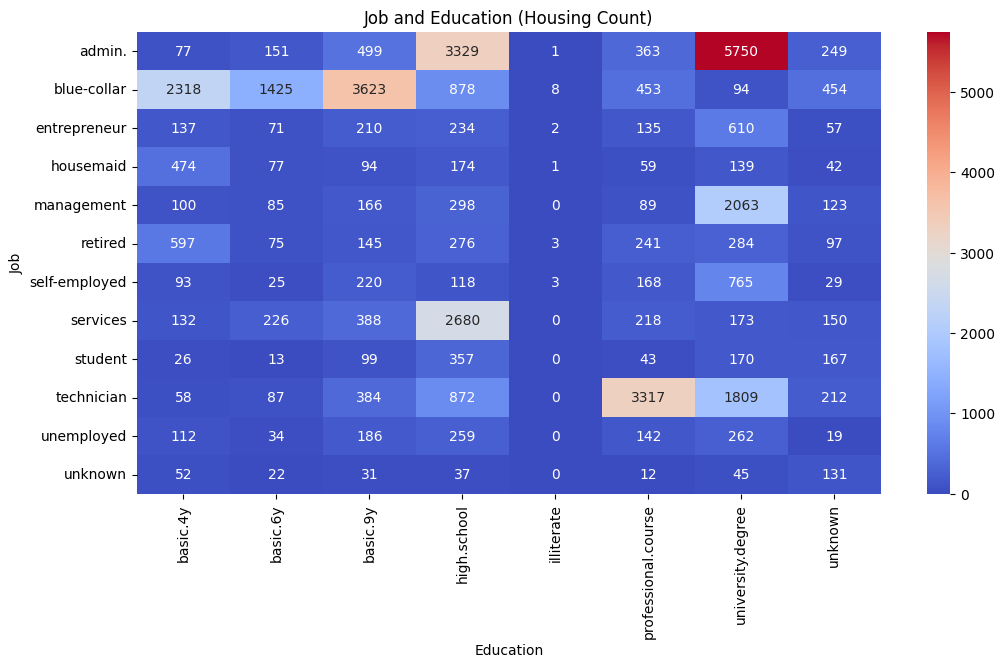


Bubble Plot: Duration vs Campaign (Size by Previous Contacts)


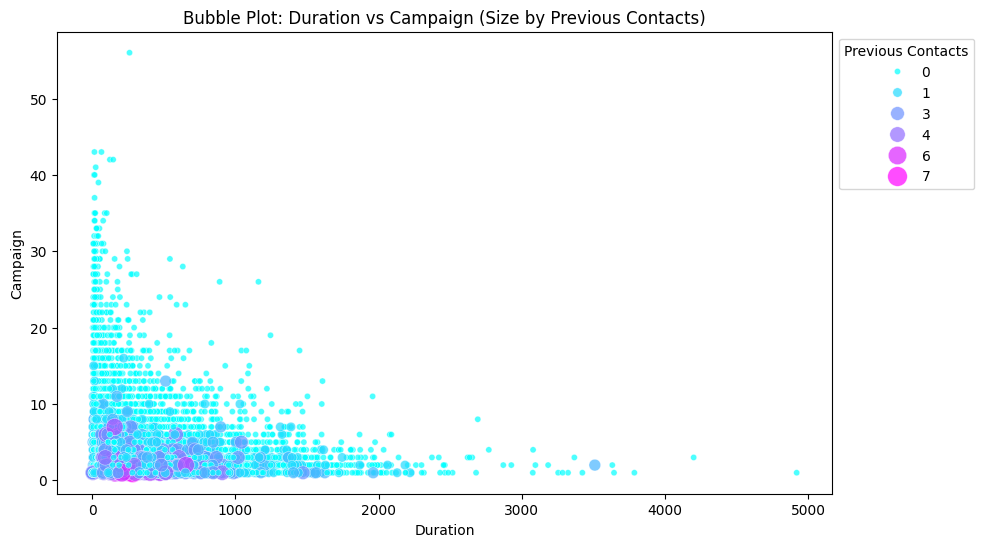


Box Plot: Marital Status vs Campaign (Colored by Housing)


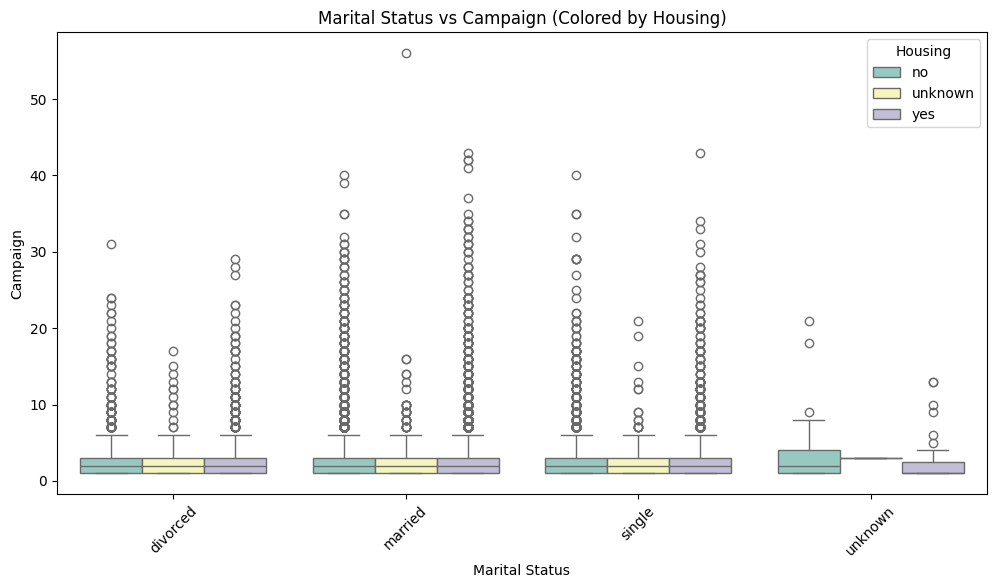

In [23]:
# Step 6: Multivariate Analysis
print("\nMultivariate Analysis")

print("\nMultivariate Analysis")
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

# 1. Stacked Bar Plot
print("\nStacked Bar Plot: Marital vs Housing colored by Default")
marital_housing = df.groupby(['marital', 'housing'])['default'].value_counts().unstack().fillna(0)
marital_housing.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Plot: Marital vs Housing (Colored by Default)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Default')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heatmap for Categorical Data Relationships
print("\nHeatmap: Job and Education with Housing Count")
heatmap_data = df.pivot_table(index='job', columns='education', values='housing', aggfunc='count').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Job and Education (Housing Count)')
plt.ylabel('Job')
plt.xlabel('Education')
plt.show()

# 3. Bubble Plot (Scatter Plot with Size)
print("\nBubble Plot: Duration vs Campaign (Size by Previous Contacts)")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='campaign', size='previous', hue='previous', sizes=(20, 200), alpha=0.7, palette='cool')
plt.title('Bubble Plot: Duration vs Campaign (Size by Previous Contacts)')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.legend(title='Previous Contacts', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print("\nBox Plot: Marital Status vs Campaign (Colored by Housing)")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='marital', y='campaign', hue='housing', palette='Set3')
plt.title('Marital Status vs Campaign (Colored by Housing)')
plt.xlabel('Marital Status')
plt.ylabel('Campaign')
plt.legend(title='Housing')
plt.xticks(rotation=45)
plt.show()



Additional Plots


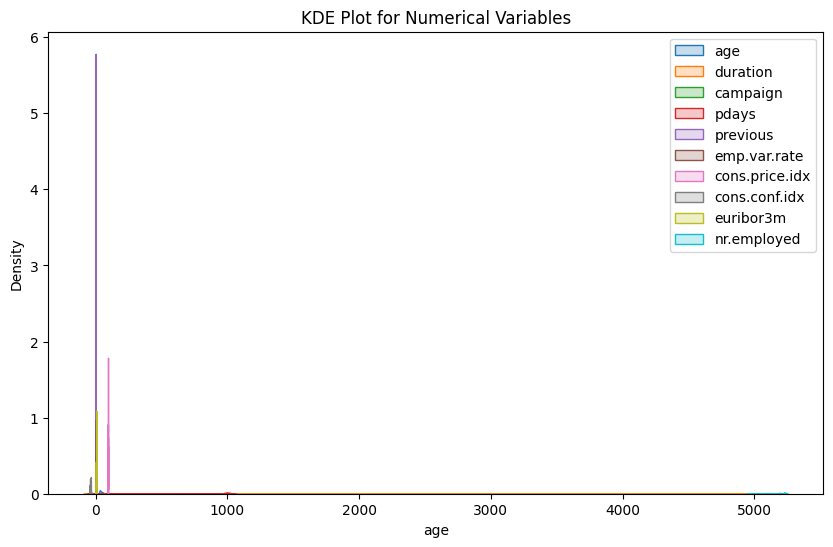

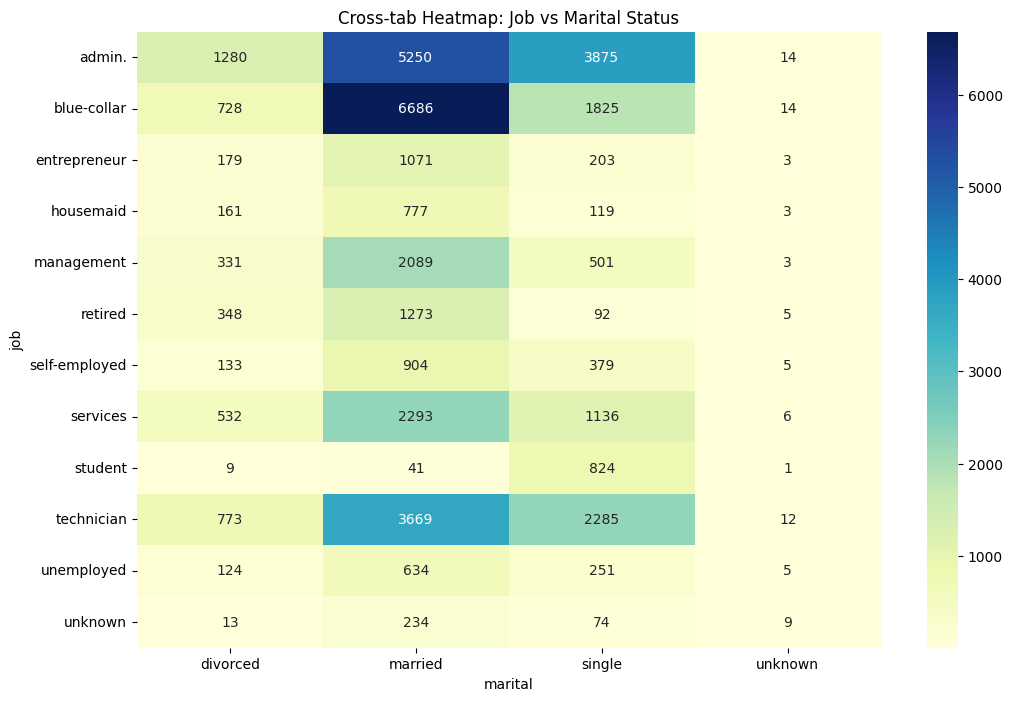

Cleaned dataset saved as bank-full-cleaned.csv


In [24]:
# Step 7: Additional Plots
# KDE plot for numerical variables
print("\nAdditional Plots")
plt.figure(figsize=(10, 6))
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.kdeplot(df[col], label=col, fill=True)
plt.title('KDE Plot for Numerical Variables')
plt.legend()
plt.show()

# Categorical heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['job'], df['marital']), annot=True, fmt="d", cmap='YlGnBu')
plt.title('Cross-tab Heatmap: Job vs Marital Status')
plt.show()

# Save cleaned dataset
df.to_csv("bank-full-cleaned.csv", index=False)
print("Cleaned dataset saved as bank-full-cleaned.csv")